In [7]:
import random
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import csv
from sklearn.cluster import KMeans

In [6]:
def get_projection(U, V):
    A, Sig, B = np.linalg.svd(V)
    u_tilda = np.matmul(A[:,0:2].T, U)
    v_tilda = np.matmul(A[:,0:2].T, V)
    return u_tilda, v_tilda

Visualization Functions

In [26]:
'''
    movies: indices of the movies (movie_id - 1)
'''
def create_visualization(movies_inds, title, V_tilda):
    x_data = [V_tilda[0][i] for i in movies_inds]
    y_data = [V_tilda[1][i] for i in movies_inds]
    group = [movies[i][1] for i in movies_inds]

    # Create dataframe
    df = pd.DataFrame({
    'x': x_data,
    'y': y_data,
    'group': group
    })

    # basic plot
    sns.set_style("whitegrid")
    p1=sns.regplot(data=df, x="x", y="y", fit_reg=False, marker="o", color="skyblue", scatter_kws={'s':40})

    # add annotations one by one with a loop
    for line in range(0,df.shape[0]):
         p1.text(df.x[line]+0.04, df.y[line], df.group[line], horizontalalignment='left', 
                 size='small', color='black', weight='semibold')


    # see it
    plt.rcParams["figure.figsize"] = (8, 4)
    plt.title(title)
    plt.show()

In [27]:
def visualization_all3movies(movies, V_tilda):
    x_data = [V_tilda[0][i[0]] for i in movies]
    y_data = [V_tilda[1][i[0]] for i in movies]
    group = [i[1] for i in movies]

    # Create dataframe
    df = pd.DataFrame({
    'x': x_data,
    'y': y_data,
    'group': group
    })
    
    sns.set_style("whitegrid")
    p1 = sns.relplot(x='x', y='y', hue='group', data=df)
    

Function for total clusterings of the entire dataset

In [50]:
def clusterings(U, V):
    with open("data/movies.txt","r", encoding="latin_1") as f:
        reader = csv.reader(f, delimiter="\t")
        # Put the contents in a matrix
        movies = np.array(list(reader))
    
    U_tilda, V_tilda = get_projection(U, V)
    
    # Get clusters for each genre:
    movie_clusters = [["unknown",[]], ["action",[]], ["adventure",[]],
                      ["animation",[]], ["children's",[]], ["comedy",[]],
                      ["crime",[]], ["documentary",[]], ["drama",[]],
                      ["fantasy",[]], ["film-noir",[]], ["horror",[]],
                      ["musical",[]], ["mystery",[]], ["romance",[]],
                      ["sci-fi",[]], ["thriller",[]], ["war",[]], 
                      ["western",[]]]
    
    for i in range(len(movies)):
        for j in range(2, 21):
            if movies[i][j] == '1':
                movie_clusters[j-2][1].append(int(movies[i][0])-1)
#     print(movie_clusters)
    
    x_data, y_data, group = [], [], []
    centers = []
    center_x = []
    center_y = []
    center_genre = []
    for genre in movie_clusters:
        temp_X = []
        for movie in genre[1]:
            x_data.append(V_tilda[0][movie])
            y_data.append(V_tilda[1][movie])
            group.append(genre[0])
            temp_X.append([V_tilda[0][movie], V_tilda[1][movie]])
        kmeans = KMeans(n_clusters=1).fit(temp_X)
#         print(kmeans.cluster_centers_[0])
        center_x.append(kmeans.cluster_centers_[0][0])
        center_y.append(kmeans.cluster_centers_[0][1])
        center_genre.append(genre[0])

    # Create dataframe 1
    df = pd.DataFrame({
    'x': x_data,
    'y': y_data,
    'genres': group
    })
    
    # Create dataframe 2
    df2 = pd.DataFrame({
    'x': center_x,
    'y': center_y,
    'genres': center_genre
    })
    
    sns.set_style("whitegrid")
    p1 = sns.relplot(x='x', y='y', hue='genres', data=df)
    plt.ylim(-1.5, 1.5)
    plt.xlim(-2.5, 2.5)
    plt.title("All Movies")
    plt.show()
    
    p2 = sns.relplot(x='x', y='y', hue='genres', data=df2)
    plt.ylim(-1.5, 1.5)
    plt.xlim(-2.5, 2.5)
    plt.title("Cluster Centers of All Genres")
    plt.show()


Visualizing Latent Factors for V-tilda 

In [29]:
def visualize(U, V):
    U_tilda, V_tilda = get_projection(U, V)
    
    # Ten movies of your choice:
    rand_movies = random.sample(range(0, 1682), 10)
    title = "Ten Movies of Our Choice"
    create_visualization(rand_movies, title, V_tilda)
    
    # Ten most popular movies:
    popular = [120, 299,   0, 287, 285, 293, 180,  99, 257,  49]
    title = "Ten Most Popular Movies"
    create_visualization(popular, title, V_tilda)
    
    # Ten best movies:
    best = [1535, 1499, 1188, 1200, 1598, 1121,  813, 1652, 1466, 1292]
    title = "Ten Best Movies"
    create_visualization(best, title, V_tilda)
    
    total_three = []
    
    # Ten movies from Children's:
    children = []
    for i in range(len(movies)):
        if movies[i][6] == '1':
            children.append(int(movies[i][0])-1)
            total_three.append([int(movies[i][0])-1, "children's"])
    rand_child = random.sample(children, 10)
    title = "Ten Children's Movies"
    create_visualization(rand_child, title, V_tilda)
    
    # Ten movies from Animation:
    animation = []
    for i in range(len(movies)):
        if movies[i][5] == '1':
            animation.append(int(movies[i][0])-1)
#             total_three.append([int(movies[i][0])-1, "animation"])

    rand_anim = random.sample(animation, 10)
    title = "Ten Animation Movies"
    create_visualization(rand_anim, title, V_tilda)
    
    # Ten movies from Horror:
    horror = []
    for i in range(len(movies)):
        if movies[i][13] == '1':
            horror.append(int(movies[i][0])-1)
            total_three.append([int(movies[i][0])-1, "horror"])

    rand_horror = random.sample(horror, 10)
    title = "Ten Horror Movies"
    create_visualization(rand_horror, title, V_tilda)
    
    # Create plots of all movies
    visualization_all3movies(total_three, V_tilda)


Visualizing Part a)

In [48]:
def grad_U(Ui, Yij, Vj, reg, eta):
    """
    Takes as input Ui (the ith row of U), a training point Yij, the column
    vector Vj (jth column of V^T), reg (the regularization parameter lambda),
    and eta (the learning rate).

    Returns the gradient of the regularized loss function with
    respect to Ui multiplied by eta.
    """
    return (1-reg*eta)*Ui + eta * Vj * (Yij - np.dot(Ui,Vj))     

def grad_V(Vj, Yij, Ui, reg, eta):
    """
    Takes as input the column vector Vj (jth column of V^T), a training point Yij,
    Ui (the ith row of U), reg (the regularization parameter lambda),
    and eta (the learning rate).

    Returns the gradient of the regularized loss function with
    respect to Vj multiplied by eta.
    """
    return (1-reg*eta)*Vj + eta * Ui * (Yij - np.dot(Ui,Vj))

def get_err(U, V, Y, reg=0.0):
    """
    Takes as input a matrix Y of triples (i, j, Y_ij) where i is the index of a user,
    j is the index of a movie, and Y_ij is user i's rating of movie j and
    user/movie matrices U and V.

    Returns the mean regularized squared-error of predictions made by
    estimating Y_{ij} as the dot product of the ith row of U and the jth column of V^T.
    """
    # Compute mean squared error on each data point in Y; include
    # regularization penalty in error calculations.
    # We first compute the total squared squared error
    err = 0.0
    for (i,j,Yij) in Y:
        err += 0.5 *(Yij - np.dot(U[i-1], V[:,j-1]))**2
    # Add error penalty due to regularization if regularization
    # parameter is nonzero
    if reg != 0:
        U_frobenius_norm = np.linalg.norm(U, ord='fro')
        V_frobenius_norm = np.linalg.norm(V, ord='fro')
        err += 0.5 * reg * (U_frobenius_norm ** 2)
        err += 0.5 * reg * (V_frobenius_norm ** 2)
    # Return the mean of the regularized error
    return err / float(len(Y))

def train_model(M, N, K, eta, reg, Y, eps=0.0001, max_epochs=300):
    """
    Given a training data matrix Y containing rows (i, j, Y_ij)
    where Y_ij is user i's rating on movie j, learns an
    M x K matrix U and N x K matrix V such that rating Y_ij is approximated
    by (UV)_ij.

    Uses a learning rate of <eta> and regularization of <reg>. Stops after
    <max_epochs> epochs, or once the magnitude of the decrease in regularized
    MSE between epochs is smaller than a fraction <eps> of the decrease in
    MSE after the first epoch.

    Returns a tuple (U, V, err) consisting of U, V, and the unregularized MSE
    of the model.
    """
    # Initialize U, V  
    U = np.random.random((M,K)) - 0.5
    V = np.random.random((K,N)) - 0.5
    size = Y.shape[0]
    delta = None
    indices = np.arange(size)    
    for epoch in range(max_epochs):
        # Run an epoch of SGD
        before_E_in = get_err(U, V, Y, reg)
        np.random.shuffle(indices)
        for ind in indices:
            (i,j, Yij) = Y[ind]
            # Update U[i], V[j]
            U[i-1] = grad_U(U[i-1], Yij, V[:,j-1], reg, eta)
            V[:,j-1] = grad_V(V[:,j-1], Yij, U[i-1], reg, eta);
        # At end of epoch, print E_in
        E_in = get_err(U, V, Y, reg)
        print("Epoch %s, E_in (regularized MSE): %s"%(epoch + 1, E_in))

        # Compute change in E_in for first epoch
        if epoch == 0:
            delta = before_E_in - E_in

        # If E_in doesn't decrease by some fraction <eps>
        # of the initial decrease in E_in, stop early            
        elif before_E_in - E_in < eps * delta:
            break
    return (U, V, get_err(U, V, Y))

# Cell 2 from notebook
with open("data/movies.txt","r", encoding="latin_1") as f:
    reader = csv.reader(f, delimiter="\t")
    
    # Put the contents in a matrix
    movies = np.array(list(reader))


# Cell 3 from notebook

Y_train = np.loadtxt('data/train.txt').astype(int)
Y_test = np.loadtxt('data/test.txt').astype(int)

M = max(max(Y_train[:,0]), max(Y_test[:,0])).astype(int) # users
N = max(max(Y_train[:,1]), max(Y_test[:,1])).astype(int) # movies
k = 20
reg = 10**-1
eta = 0.03 # learning rate

U,V, e_in = train_model(M, N, k, eta, reg, Y_train)

Epoch 1, E_in (regularized MSE): 0.5080005985710543
Epoch 2, E_in (regularized MSE): 0.42790167254657707
Epoch 3, E_in (regularized MSE): 0.4070722566814727
Epoch 4, E_in (regularized MSE): 0.3915734385892059
Epoch 5, E_in (regularized MSE): 0.37683679255043856
Epoch 6, E_in (regularized MSE): 0.36576195722446264
Epoch 7, E_in (regularized MSE): 0.36036450598834574
Epoch 8, E_in (regularized MSE): 0.3489719110145114
Epoch 9, E_in (regularized MSE): 0.342278636842326
Epoch 10, E_in (regularized MSE): 0.3356582977978395
Epoch 11, E_in (regularized MSE): 0.33047780271632377
Epoch 12, E_in (regularized MSE): 0.3237425320967021
Epoch 13, E_in (regularized MSE): 0.32259375139620006
Epoch 14, E_in (regularized MSE): 0.31871507638489854
Epoch 15, E_in (regularized MSE): 0.3138559376645766
Epoch 16, E_in (regularized MSE): 0.30942913074359124
Epoch 17, E_in (regularized MSE): 0.30901257922047287


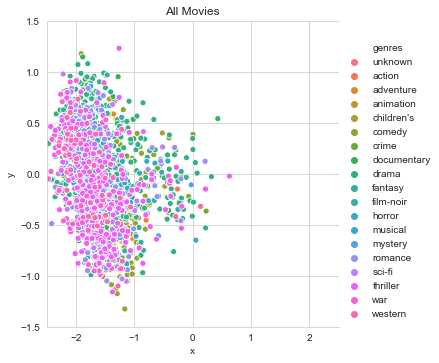

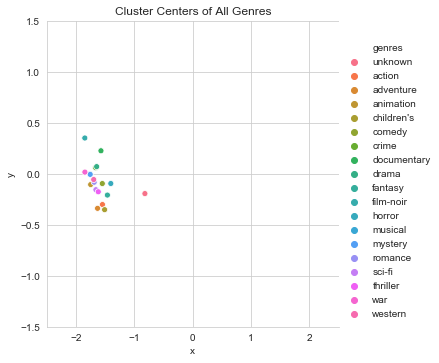

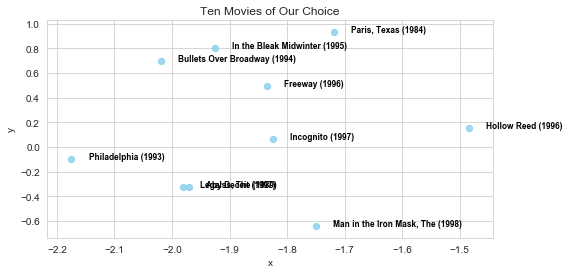

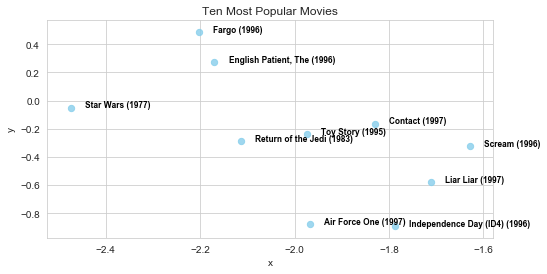

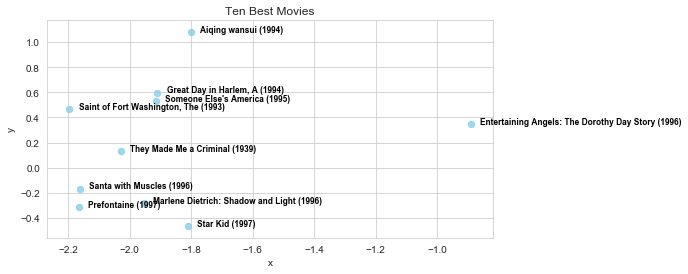

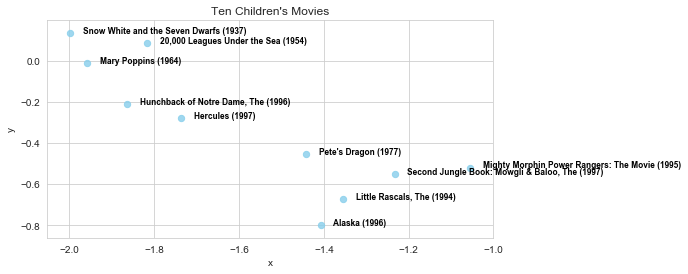

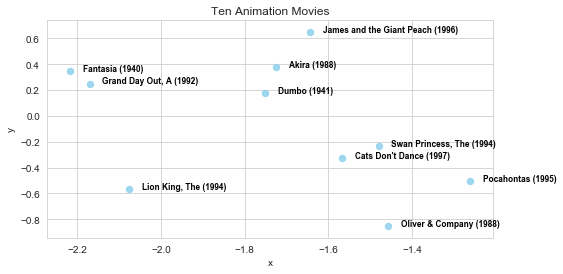

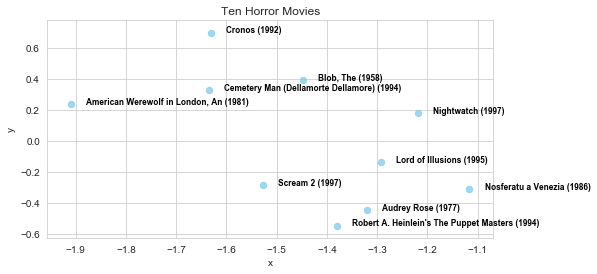

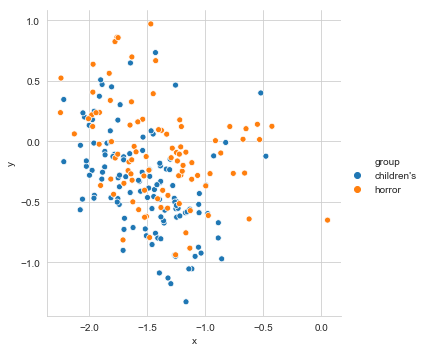

In [51]:
clusterings(U.T, V)
visualize(U.T, V)

Visualizing Part b)

In [52]:
def grad_U(Ui, Yij, Vj, ai, bj, reg, eta):
    """
    Takes as input Ui (the ith row of U), a training point Yij, the column
    vector Vj (jth column of V^T), reg (the regularization parameter lambda),
    and eta (the learning rate).

    Returns the gradient of the regularized loss function with
    respect to Ui multiplied by eta.
    """
    return (1-reg*eta)*Ui + eta * Vj * (Yij - np.dot(Ui,Vj) - ai - bj)     

def grad_V(Vj, Yij, Ui, ai, bj, reg, eta):
    """
    Takes as input the column vector Vj (jth column of V^T), a training point Yij,
    Ui (the ith row of U), reg (the regularization parameter lambda),
    and eta (the learning rate).

    Returns the gradient of the regularized loss function with
    respect to Vj multiplied by eta.
    """
    return (1-reg*eta)*Vj + eta * Ui * (Yij - np.dot(Ui,Vj) - ai - bj)

def get_err(U, V, Y, a, b, reg=0.0):
    """
    Takes as input a matrix Y of triples (i, j, Y_ij) where i is the index of a user,
    j is the index of a movie, and Y_ij is user i's rating of movie j and
    user/movie matrices U and V.

    Returns the mean regularized squared-error of predictions made by
    estimating Y_{ij} as the dot product of the ith row of U and the jth column of V^T.
    """
    # Compute mean squared error on each data point in Y; include
    # regularization penalty in error calculations.
    # We first compute the total squared squared error
    err = 0.0
    for (i,j,Yij) in Y:
        err += 0.5 *(Yij - np.dot(U[i-1], V[:,j-1]) - a[i-1] - b[j-1])**2
    # Add error penalty due to regularization if regularization
    # parameter is nonzero
    if reg != 0:
        U_frobenius_norm = np.linalg.norm(U, ord='fro')
        V_frobenius_norm = np.linalg.norm(V, ord='fro')
        err += 0.5 * reg * (U_frobenius_norm ** 2)
        err += 0.5 * reg * (V_frobenius_norm ** 2)
    # Return the mean of the regularized error
    return err / float(len(Y))

def train_model(M, N, K, eta, reg, Y, eps=0.0001, max_epochs=300):
    """
    Given a training data matrix Y containing rows (i, j, Y_ij)
    where Y_ij is user i's rating on movie j, learns an
    M x K matrix U and N x K matrix V such that rating Y_ij is approximated
    by (UV)_ij.

    Uses a learning rate of <eta> and regularization of <reg>. Stops after
    <max_epochs> epochs, or once the magnitude of the decrease in regularized
    MSE between epochs is smaller than a fraction <eps> of the decrease in
    MSE after the first epoch.

    Returns a tuple (U, V, err) consisting of U, V, and the unregularized MSE
    of the model.
    """
    
    a = np.zeros(M)
    acount = np.zeros(M)
    b = np.zeros(N)
    bcount = np.zeros(N)
    
    for idx in range(Y.shape[0]):
        i, j, Y_ij = Y[idx]
        i -= 1
        j -= 1
        a[i] += Y_ij
        acount[i] += 1
        b[j] = Y_ij
        bcount[j] += 1
        
    for idx in range(M):
        if (acount[idx] != 0):
            a[idx] /= acount[idx]
        
    for idx in range(N):
        if (bcount[idx] != 0):
            b[idx] /= bcount[idx]
            
    # Initialize U, V  
    U = np.random.random((M,K)) - 0.5
    V = np.random.random((K,N)) - 0.5
    size = Y.shape[0]
    delta = None
    indices = np.arange(size)    
    for epoch in range(max_epochs):
        # Run an epoch of SGD
        before_E_in = get_err(U, V, Y, a, b, reg)
        np.random.shuffle(indices)
        for ind in indices:
            (i,j, Yij) = Y[ind]
            # Update U[i], V[j]
            U[i-1] = grad_U(U[i-1], Yij, V[:,j-1], a[i-1], b[j-1], reg, eta)
            V[:,j-1] = grad_V(V[:,j-1], Yij, U[i-1], a[i-1], b[j-1], reg, eta);
        # At end of epoch, print E_in
        E_in = get_err(U, V, Y, a, b, reg)
        print("Epoch %s, E_in (regularized MSE): %s"%(epoch + 1, E_in))

        # Compute change in E_in for first epoch
        if epoch == 0:
            delta = before_E_in - E_in

        # If E_in doesn't decrease by some fraction <eps>
        # of the initial decrease in E_in, stop early            
        elif before_E_in - E_in < eps * delta:
            break
    return (U, V, get_err(U, V, Y, a, b))

# Cell 2 from notebook
with open("data/movies.txt","r", encoding="latin_1") as f:
    reader = csv.reader(f, delimiter="\t")
    
    # Put the contents in a matrix
    movies = np.array(list(reader))


# Cell 3 from notebook

Y_train = np.loadtxt('data/train.txt').astype(int)
Y_test = np.loadtxt('data/test.txt').astype(int)

M = max(max(Y_train[:,0]), max(Y_test[:,0])).astype(int) # users
N = max(max(Y_train[:,1]), max(Y_test[:,1])).astype(int) # movies
k = 20
reg = 10**-1
eta = 0.03 # learning rate

U,V, e_in = train_model(M, N, k, eta, reg, Y_train)

Epoch 1, E_in (regularized MSE): 0.5205962276767264
Epoch 2, E_in (regularized MSE): 0.4701253575112333
Epoch 3, E_in (regularized MSE): 0.4247389977649154
Epoch 4, E_in (regularized MSE): 0.3970665036180859
Epoch 5, E_in (regularized MSE): 0.3774291263703926
Epoch 6, E_in (regularized MSE): 0.36206425613448484
Epoch 7, E_in (regularized MSE): 0.34913093213737706
Epoch 8, E_in (regularized MSE): 0.33850064598207974
Epoch 9, E_in (regularized MSE): 0.328535873006409
Epoch 10, E_in (regularized MSE): 0.3204818403925691
Epoch 11, E_in (regularized MSE): 0.3139147022228004
Epoch 12, E_in (regularized MSE): 0.30750208026267023
Epoch 13, E_in (regularized MSE): 0.30173948152499847
Epoch 14, E_in (regularized MSE): 0.29690949380893267
Epoch 15, E_in (regularized MSE): 0.2931750494451888
Epoch 16, E_in (regularized MSE): 0.2890303507768381
Epoch 17, E_in (regularized MSE): 0.2863862335672813
Epoch 18, E_in (regularized MSE): 0.2841218795226712
Epoch 19, E_in (regularized MSE): 0.28088047722348

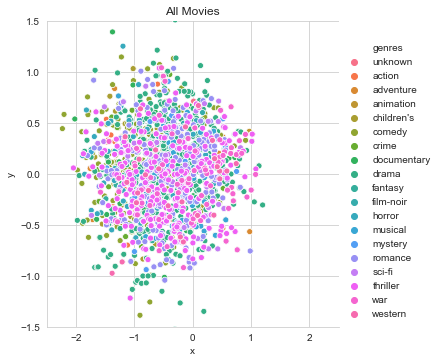

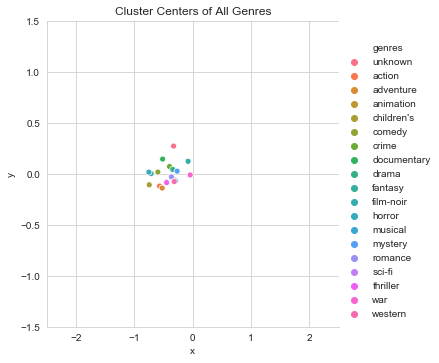

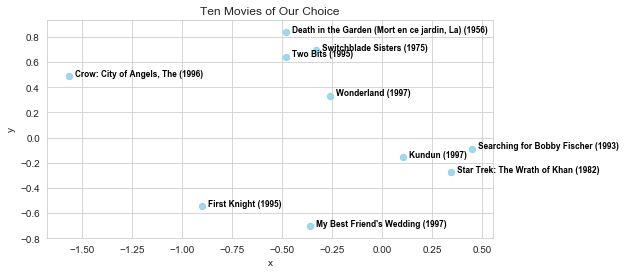

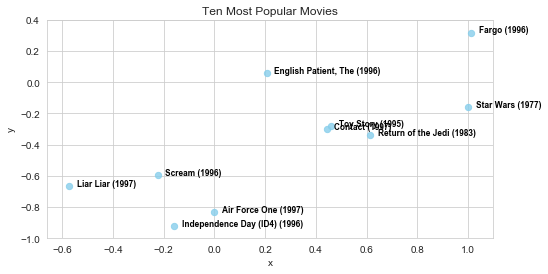

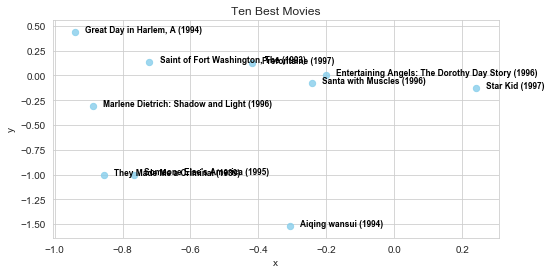

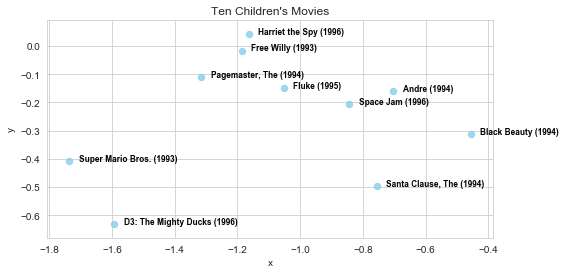

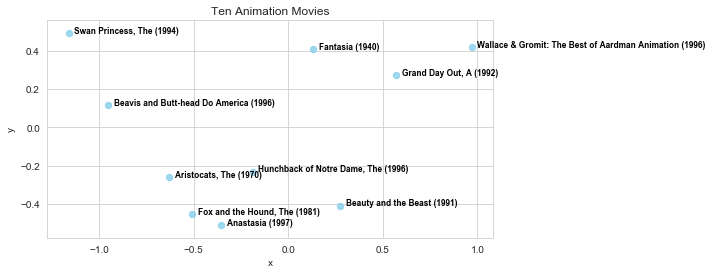

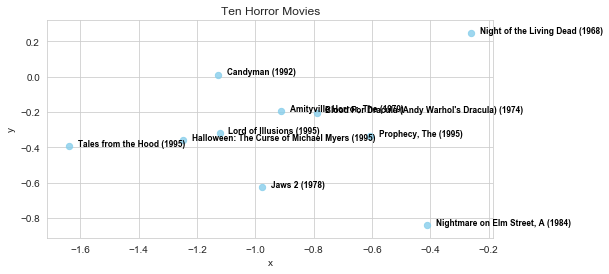

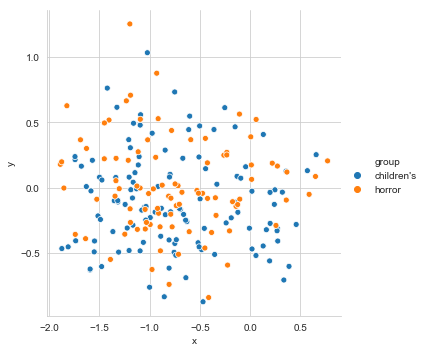

In [53]:
clusterings(U.T, V)
visualize(U.T, V)

Visualizing Part c)

In [54]:
import pandas as pd
import numpy as np
from surprise import NormalPredictor, Dataset, SVD, Reader
from surprise.model_selection import cross_validate
from surprise import accuracy

df_train = pd.read_csv("data/train.txt", delimiter="\t", encoding="latin_1",
header = None)
rated_movies = df_train.iloc[:,1].unique()
train_data = Dataset.load_from_df(df_train, Reader())
train_data = train_data.build_full_trainset()
df_test = pd.read_csv("data/test.txt", delimiter="\t", encoding="latin_1",
header = None)
df_test = df_test[df_test.iloc[:,1].isin(rated_movies)]
test_data = Dataset.load_from_df(df_test, Reader())

algo = SVD(n_factors=20)
algo.fit(train_data)
predictions = algo.test(test_data.build_full_trainset().build_testset())
U = algo.pu
V = algo.qi
accuracy.rmse(predictions, verbose=True)

RMSE: 0.9247


0.9247487585140556

In [55]:
print(np.shape(U), np.shape(V))
U1, V1 = U.T, V.T
print(np.shape(U1), np.shape(V1))
A, Sig, B = np.linalg.svd(V1)
U_tilda = np.matmul(A[:,0:2].T, U1)
V_tilda = np.matmul(A[:,0:2].T, V1)

(943, 20) (1668, 20)
(20, 943) (20, 1668)


/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:18: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.


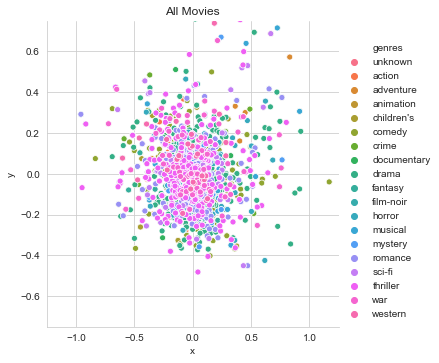

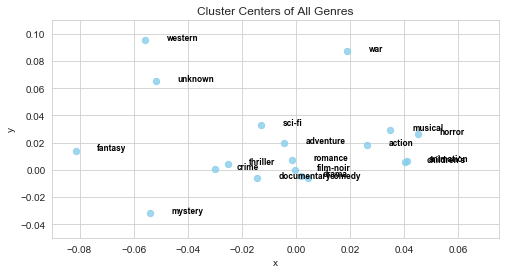

In [65]:
with open("data/movies.txt","r", encoding="latin_1") as f:
    reader = csv.reader(f, delimiter="\t")
    # Put the contents in a matrix
    movies = np.array(list(reader))

i = 0
while i < len(movies):
    if movies[i][0] in ['1349','1363','1458','1541','1541',
                     '1561','1576','1579','1581','1606',
                     '1633','1651','1666','1667','1678']:
        movies = np.delete(movies, i, 0)
    else:
        movies[i][0] = str(i + 1)
        i += 1
    
movies = np.delete(movies, [1348,1362,1457,1540,1540,
             1560,1575,1578,1580,1605,
             1632,1650,1665,1666,1677], 0)

# Get clusters for each genre:
movie_clusters = [["unknown",[]], ["action",[]], ["adventure",[]],
                  ["animation",[]], ["children's",[]], ["comedy",[]],
                  ["crime",[]], ["documentary",[]], ["drama",[]],
                  ["fantasy",[]], ["film-noir",[]], ["horror",[]],
                  ["musical",[]], ["mystery",[]], ["romance",[]],
                  ["sci-fi",[]], ["thriller",[]], ["war",[]], 
                  ["western",[]]]

for i in range(len(movies)):
    for j in range(2, 21):
        if movies[i][j] == '1':
            movie_clusters[j-2][1].append(int(movies[i][0])-1)
#     print(movie_clusters)

x_data, y_data, group = [], [], []
centers = []
center_x = []
center_y = []
center_genre = []
for genre in movie_clusters:
    temp_X = []
    for movie in genre[1]:
        x_data.append(V_tilda[0][movie])
        y_data.append(V_tilda[1][movie])
        group.append(genre[0])
        temp_X.append([V_tilda[0][movie], V_tilda[1][movie]])
    kmeans = KMeans(n_clusters=1).fit(temp_X)
    center_x.append(kmeans.cluster_centers_[0][0])
    center_y.append(kmeans.cluster_centers_[0][1])
    center_genre.append(genre[0])

# Create dataframe 1
df = pd.DataFrame({
'x': x_data,
'y': y_data,
'genres': group
})

# Create dataframe 2
df2 = pd.DataFrame({
'x': center_x,
'y': center_y,
'genres': center_genre
})

sns.set_style("whitegrid")
p1 = sns.relplot(x='x', y='y', hue='genres', data=df)
plt.ylim(-0.75, 0.75)
plt.xlim(-1.25, 1.25)
plt.title("All Movies")
plt.show()


sns.set_style("whitegrid")
p2= sns.regplot(data=df2, x="x", y="y", fit_reg=False, marker="o", color="skyblue", scatter_kws={'s':40})
# add annotations one by one with a loop
for line in range(0,df2.shape[0]):
     p2.text(df2.x[line]+0.008, df2.y[line], df2.genres[line], horizontalalignment='left', 
             size='small', color='black', weight='semibold')
plt.ylim(-0.05, 0.11)
plt.xlim(-0.09, 0.075)
plt.title("Cluster Centers of All Genres")
plt.show()

In [66]:
'''
    movies: indices of the movies (movie_id - 1)
'''
def create_visualization(movies_inds, title, V_tilda):
    x_data = [V_tilda[0][i] for i in movies_inds]
    y_data = [V_tilda[1][i] for i in movies_inds]
    group = [movies[i][1] for i in movies_inds]

    # Create dataframe
    df = pd.DataFrame({
    'x': x_data,
    'y': y_data,
    'group': group
    })

    # basic plot
    sns.set_style("whitegrid")
    p1=sns.regplot(data=df, x="x", y="y", fit_reg=False, marker="o", color="skyblue", scatter_kws={'s':40})

    # add annotations one by one with a loop
    for line in range(0,df.shape[0]):
         p1.text(df.x[line]+0.03, df.y[line], df.group[line], horizontalalignment='left', 
                 size='small', color='black', weight='semibold')


    # see it
    plt.rcParams["figure.figsize"] = (8, 4)
    plt.title(title)
    plt.show()
    
def visualize(U, V):
    U_tilda, V_tilda = get_projection(U, V)
    
    # Ten movies of your choice:
    rand_movies = random.sample(range(0, 1682), 10)
    title = "Ten Movies of Our Choice"
    create_visualization(rand_movies, title, V_tilda)
    
    # Ten most popular movies:
    popular = [120, 299,   0, 287, 285, 293, 180,  99, 257,  49]
    title = "Ten Most Popular Movies"
    create_visualization(popular, title, V_tilda)
    
    # Ten best movies:
    best = [1535, 1499, 1188, 1200, 1598, 1121,  813, 1652, 1466, 1292]
    title = "Ten Best Movies"
    create_visualization(best, title, V_tilda)
    
    total_three = []
    
    # Ten movies from Children's:
    children = []
    for i in range(len(movies)):
        if movies[i][6] == '1':
            children.append(int(movies[i][0])-1)
            total_three.append([int(movies[i][0])-1, "children's"])
    rand_child = random.sample(children, 10)
    title = "Ten Children's Movies"
    create_visualization(rand_child, title, V_tilda)
    
    # Ten movies from Animation:
    animation = []
    for i in range(len(movies)):
        if movies[i][5] == '1':
            animation.append(int(movies[i][0])-1)
#             total_three.append([int(movies[i][0])-1, "animation"])

    rand_anim = random.sample(animation, 10)
    title = "Ten Animation Movies"
    create_visualization(rand_anim, title, V_tilda)
    
    # Ten movies from Horror:
    horror = []
    for i in range(len(movies)):
        if movies[i][13] == '1':
            horror.append(int(movies[i][0])-1)
            total_three.append([int(movies[i][0])-1, "horror"])

    rand_horror = random.sample(horror, 10)
    title = "Ten Horror Movies"
    create_visualization(rand_horror, title, V_tilda)
    
    # Create plots of all movies
    visualization_all3movies(total_three, V_tilda)

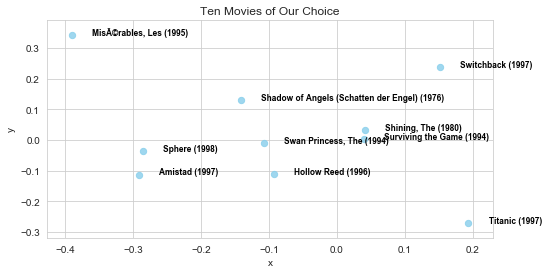

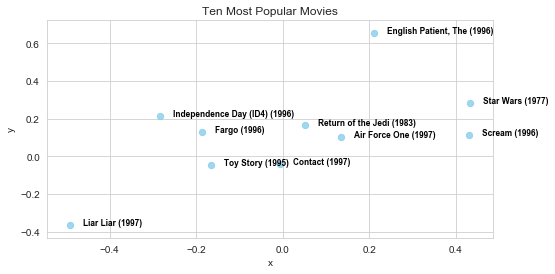

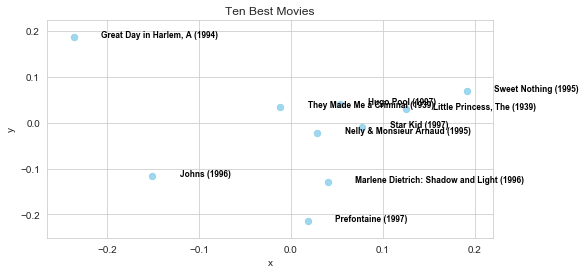

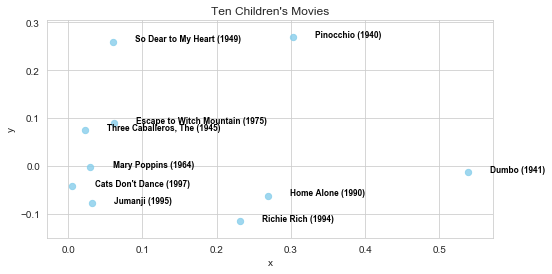

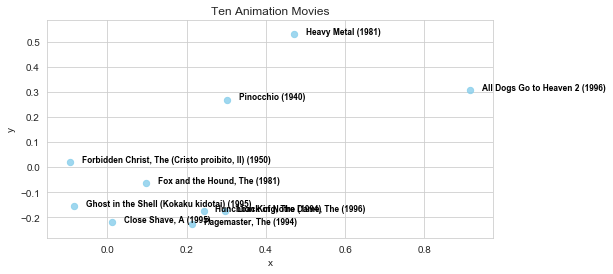

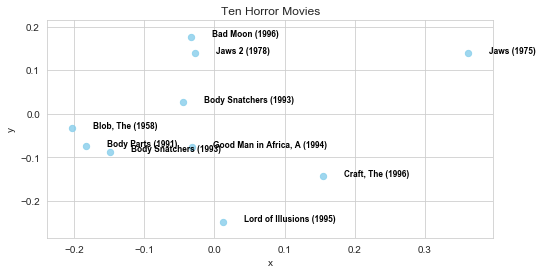

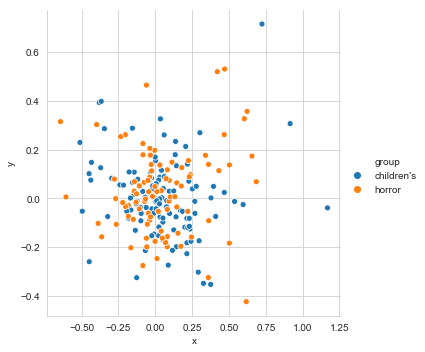

In [67]:
visualize(U.T, V.T)

In [1]:
def get_projection2(U, V, n):
    A, Sig, B = np.linalg.svd(V)
    u_tilda = np.matmul(A[:,0:n].T, U)
    v_tilda = np.matmul(A[:,0:n].T, V)
    return u_tilda, v_tilda

In [2]:
'''
    movies: indices of the movies (movie_id - 1)
'''
def create_visualization_avg(movies_inds, title, V_tilda):
    x_data = [V_tilda[0][i] for i in movies_inds]
    y_data = [V_tilda[1][i] for i in movies_inds]
    z_data = [V_tilda[2][i] for i in movies_inds]
    s_data = [V_tilda[3][i] for i in movies_inds]
    t_data = [V_tilda[4][i] for i in movies_inds]
    group = [movies[i][1] for i in movies_inds]
    
    x = np.average(x_data)
    y = np.average(y_data)
    z = np.average(z_data)
    s = np.average(s_data)
    t = np.average(t_data)
    
    return ([x, y, z, s, t])

In [ ]:
U_tilda, V_tilda = get_projection2(U.T, V, 5)
for j in range(2, 21):
    values = []
    for i in range(len(movies)):
        if movies[i][j] == '1':
            values.append(int(movies[i][0])-1)

    title = "title"
    out = create_visualization_avg(values, title, V_tilda)
    if (j == 2):
        result = out
    else:
        result = np.vstack((result, out))
        
for factor in range(5):
    temp_arr = []
    for category in range(19):
        temp_arr.append(result[category][factor])
    for category in range(19):
        result[category][factor] = (result[category][factor] - min(temp_arr)) / (max(temp_arr) - min(temp_arr))
print(result)